# Aprendizaje Automático
#### Segundo cuatrimestre 2025

## Regresión Lineal

#### Bibliografía: 
* Pattern Recognition and Machine Learning, Christopher M. Bishop. Capíulo 3.
* The Elements of Statistical Learning, Trevor Hastie, Robert Tibshirani, Jerome Friedman. Capítulo 3.
* Para SVD, considerar este [link](https://www.youtube.com/watch?v=gXbThCXjZFM&list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv&index=1). Con los primeros cuatro videos es suficiente para arrancar.

Papers:
* Ridge Regression: Biased Estimation for Nonorthogonal Problems, Arthur E. Hoerl and Robert W. Kennard, 1970.
* Regression Shrinkage and Selection via the Lasso, Robert Tibshirani, 1996.
* Regularization and variable selection via the elastic net, Hui Zou y Trevor Hastie, 2005.

### Repaso

La regresión lineal es un modelo que asume que la relación entre las variables de entrada $X^T = (X_1, X_2,..., X_p)$ y la variable de salida $Y$ es lineal. Entonces, toma la forma:

$$ f(X) = \beta_0 + \sum_{j=1}^{p} X_j \beta_j$$

En general, se suele escribir de la forma más compacta

$$ f(X) = X^T \beta$$

donde $X$ es un vector de tamaño $p+1$ que contiene un 1 en la primera posición y los valores de las variables de entrada en las siguientes posiciones. $\beta = (\beta_0, \beta_1, ..., \beta_p)$ es el vector de coeficientes a estimar.

### Repaso

El método más común para encontrar los coeficientes es el de **cuadrados mínimos**, que consiste en minimizar la suma de los residuos al cuadradado respecto de $\beta$. Utilizando notación matricial, esto se escribe como:

$$ RSS (\beta) = ||\textbf{y} - \textbf{X} \beta||^2 = (\textbf{y} - \textbf{X} \beta)^T (\textbf{y} - \textbf{X} \beta) $$

y la solución es:

$$ \hat{\beta} = (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T \textbf{y} $$

De esta forma, las predicciones $\hat{\textbf{y}}$ se obtienen como:

$$\hat{\textbf{y}} = \textbf{X} \hat{\beta} = \textbf{X} (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T \textbf{y}$$

Desde un punto de vista operativo, ya está. Obtuvimos un estimador de los coeficientes $\hat{\beta}$ que nos sirve para hacer predicciones. No hay, prácticamente, ninguna hipótesis sobre los datos, más allá de que $\textbf{X}$ tiene rango completo.

### Repaso

Si asumismo que $Var(\epsilon) = \sigma^2 I$, entonces:

$$Var(\hat{\beta}) = \sigma^2 (\textbf{X}^T \textbf{X})^{-1}$$

Podemos estimar $\sigma^2$ como 

$$\hat{\sigma}^2 = \frac{1}{N - p - 1} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 $$


### Máxima Verosimilitud



Otro método muy común es el de *máxima verosimilitud*. Dado el modelo $Y = f_\theta(X) + \epsilon$, el principio de máxima verosimilitud asume que los valores más *razonables* de $\theta$ son aquellos que maximizan la probabilidad de los datos observados. Para un conjunto de datos $(\textbf{X}, \textbf{y})$, la verosimilitud de los datos es la probabilidad conjunta de observar los datos dados los parámetros del modelo $\theta$:

$$ P(\textbf{y} | \textbf{X}, \theta) = P(y_1, y_2, ..., y_N | x_1, x_2, ..., x_N, \theta)$$

Si asumimos que los datos son independientes, la verosimilitud se puede escribir como el producto de las probabilidades individuales:

$$ \mathcal{L}(\theta) = P(\textbf{y} | \textbf{X}, \theta) = \prod_{i=1}^{N} P(y_i | x_i, \theta)$$

En general, es común trabajar con el logaritmo de la verosimilitud, que se puede escribir como:

$$ \log \mathcal{L}(\theta)  = \sum_{i=1}^{N} \log P(y_i | x_i, \theta)$$

**Notación:** cada $x_i$ es un vector de tamaño $p$, e $y_i$ es un escalar.

### Máxima Verosimilitud

* Se suele asumir que los errores son independientes e idénticamente distribuidos (iid), bajo una distribución normal $\epsilon \sim \mathcal{N}(0, \sigma^2) $. Entonces, la probabilidad condicional de $y_i$ dado $x_i$ y $\theta$ se puede escribir como:

$$ P(y_i | x_i, \theta) = \mathcal{N}(f_\theta(x_i), \sigma^2) $$

$$ P(y_i | x_i, \theta) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(y_i - f_\theta(x_i))^2}{2 \sigma^2}}$$


Por lo que el logartimo de la verosimilitud queda como:

$$ \log \mathcal{L}(\theta, \sigma^2) = -\frac{N}{2} \log(2 \pi \sigma^2) - N \log \sigma - \frac{1}{2 \sigma^2} \sum_{i=1}^{N} (y_i - f_\theta(x_i))^2$$

* Entonces, para el modelo lineal $ Y = X^T \beta + \epsilon$, la verosimilitud se puede escribir como:

$$ \log \mathcal{L}(\beta, \sigma^2) = -\frac{N}{2} \log(2 \pi \sigma^2) - N \log \sigma - \frac{1}{2 \sigma^2} \sum_{i=1}^{N} (y_i - x_i^T \beta)^2$$

### Máxima Verosimilitud

#### Forma matricial

$$ \log \mathcal{L}(\beta, \sigma^2) = -\frac{N}{2} \log(2 \pi \sigma^2) - N \log \sigma - \frac{1}{2 \sigma^2} (\textbf{y} - \textbf{X} \beta)^T (\textbf{y} - \textbf{X} \beta)$$

que, para maximizar respecto a $\beta$, solamente importa el término $-\frac{1}{2 \sigma^2} (\textbf{y} - \textbf{X} \beta)^T (\textbf{y} - \textbf{X} \beta)$, ya que el resto no depende de $\beta$. Entonces, la maximización de la verosimilitud es equivalente a minimizar la suma de los residuos al cuadrado, cuya solución es la que ya encontramos anteriormente.

Obtenido $\hat{\beta}$, podemos sustituirlo en la expresión de la verosimilitud y maximizar respecto a $\sigma^2$:

$$ \log \mathcal{L}(\hat{\beta}, \sigma^2) = -\frac{N}{2} \log(2 \pi \sigma^2) - N \log \sigma - \frac{1}{2 \sigma^2} (\textbf{y} - \textbf{X} \hat{\beta})^T (\textbf{y} - \textbf{X} \hat{\beta})$$

Lo que nos da la estimación de $\sigma^2$ como:

$$ \hat{\sigma}^2 = \frac{1}{N} (\textbf{y} - \textbf{X} \hat{\beta})^T (\textbf{y} - \textbf{X} \hat{\beta})$$

Como éste es un estimador sesgado, se suele utilizar:

$$ \hat{\sigma}^2 = \frac{1}{N - p - 1} (\textbf{y} - \textbf{X} \hat{\beta})^T (\textbf{y} - \textbf{X} \hat{\beta})$$

| Característica                      | Cuadrados Mínimos (general)                                                                 | Máxima Verosimilitud (general)                                                                   | Caso específico: Regresión Lineal Multivariada                                                                                                        |
|-------------------------------------|------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------|
| Objetivo                            | Minimizar la suma de los residuos al cuadrado                                                                  | Maximizar la verosimilitud de los datos                                                             | Minimizar el error cuadrático entre predicciones lineales y observaciones                                                                                |
| Función objetivo                    | $\min_{\beta} \sum (y_i - f(\mathbf{x}_i, \beta))^2$                                             | $\max_{\beta} \prod p(y_i \mid \mathbf{x}_i, \beta)$                                                | $\min_{\beta} \sum (y_i - \mathbf{x}_i^T \beta)^2$                                                                                                       |
| Supuestos sobre errores             | Ninguno (aplicable a cualquier función de predicción)                                           | Distribución conocida del error (por ejemplo, normalidad)                                           | Normalidad, iid, media cero, varianza constante                                                                                                          |
| Resultado para la estimación de $\beta$ | Depende de la función $f(\mathbf{x}_i, \beta)$                                                   | Depende de la función de verosimilitud                                                             | $\hat{\beta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$                                                                                 |
| Robustez                            | Depende de la elección de $f(\mathbf{x}_i, \beta)$                                               | Sensible a mal especificación del modelo                                                           | Sensible a outliers debido al error cuadrático                                                                                                           |
| Varianza de los errores             | No necesariamente explícita                                                                     | Incluida si se especifica la distribución                                                           | $\hat{\sigma}^2 = \frac{1}{N - p} \sum (y_i - \mathbf{x}_i^T \hat{\beta})^2$                                                                              |
| Estimación de incertidumbre         | Depende de la función de predicción y supuestos adicionales                                       | Incluida en el modelo si se asume distribución                                                      | Utiliza la varianza estimada de los residuos                                                                                                             |
| Contexto típico                     | Modelos lineales o no lineales, regresión polinómica, redes neuronales, entre otros               | Modelos probabilísticos, GLM, modelos lineales generalizados                                        | Regresión lineal simple o múltiple                                                                                                                      |
| Extensión a modelos complejos       | Natural si se elige una función de predicción adecuada                                           | Natural para modelos probabilísticos                                                                | Se pueden incorporar regularizaciones (Ridge, Lasso)                                                                                                     |



**¿Qué pasa si $X$ no tiene rango completo?¿Qué pasa si hay predictores correlacionados o si hay multicolinealidad?**

### Singular Value Decomposition (SVD)

La descomposición en valores singulares (SVD) es una técnica que permite descomponer cualquier matriz $X$ de tamaño $N \times p$ en tres matrices:

$$ X = U D V^T $$

donde
* $U$ es una matriz ortogonal de tamaño $N \times p$ cuyas columnas forman una base para el espacio columna de $X$.
* $D$ es una matriz diagonal de tamaño $p \times p$. Los valores en la diagonal cumplen que $d_1 \geq d_2 \geq ... \geq d_p \geq 0$. Estos valores son los *valores singulares* de $X$.
    * Si uno o más $d_j$ son cero, significa que $X$ no tiene rango completo.
* $V$ es una matriz ortogonal de tamaño $p \times p$ cuyas columnas forman una base para el espacio filas de $X$.

**Nota:** En general, se suele llamar *ortogonal* a una matriz cuadrada $Q$ que cumple que $Q^T Q = Q Q^T = I$. Esto implica que $Q^{-1} = Q^T$ y que las columnas de $Q$ son ortonormales (los vectores columna de $Q$ son ortogonales entre sí y tienen norma 1). Si la matriz no es cuadrada, se puede hablar de *semi-ortogonalidad*, y se cumple que $Q^T Q = I$ y $QQ^T$.

### Singular Value Decomposition (SVD)

Algunas características:

* La formulación que acabamos de hacer de SVD no es única. En algunas formulaciones, las dimensiones de las matrices son un poco diferentes. En particular, la versión que les acabamos de contar se suele mencionar como SVD compacta, que es la que se utiliza en la mayoría de los casos prácticos cuando $N \gt p$.

### Singular Value Decomposition (SVD)

<img src="Figuras/Reduced_Singular_Value_Decompositions.svg.png" alt="Figura 1" width="300" />


1. *Full SVD*
1. *Thin SVD*: eliminar columnas de $U$ no asociadas a filas de $V^T$.
1. *Compact SVD*: eliminar los valores singulares $d_j = 0$ y las columnas/filas correspondientes en $U$ y $V^T$.
1. *Truncated SVD*: quedarse con los $t$ mayores valores singulares y las columnas/filas correspondientes en $U$ y $V^T$.


### Singular Value Decomposition (SVD)

Algunas características:

* La formulación que acabamos de hacer de SVD no es única. En algunas formulaciones, las dimensiones de las matrices son un poco diferentes. En particular, la versión que les acabamos de contar se suele mencionar como SVD compacta, que es la que se utiliza en la mayoría de los casos prácticos cuando $N \gt p$.
* Incluso dentro de una misma formulación, la descomposición no es única. 

Antes de pasar a su interpretación y cómo se calcula, veamos algunos ejemplos.


In [5]:
import numpy as np

X = np.array([[1, 1], [0, 1], [1, 2], [1, 3]])
#X = np.array([[1, 1], [1, 1], [1, 2], [1, 3]])
X = np.array([[1, 1, 1], [0, 1, 1], [1, 2, 2], [1,3, 3]])
X, np.linalg.matrix_rank(X)

(array([[1, 1, 1],
        [0, 1, 1],
        [1, 2, 2],
        [1, 3, 3]]),
 np.int64(2))

In [7]:
U, D, Vh = np.linalg.svd(X, full_matrices=False)
print(f'U: \n {U} \n')
print(f'D: \n {np.diag(D)} \n')
print(f'V^t: \n{Vh} \n')

U: 
 [[-0.28718363  0.76432469  0.49807062]
 [-0.23857053 -0.52575416  0.20607919]
 [-0.52575416  0.23857053 -0.79006204]
 [-0.76432469 -0.28718363  0.29199143]] 

D: 
 [[5.69607046e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.44836412e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.33707544e-17]] 

V^t: 
[[-0.27690361 -0.67945728 -0.67945728]
 [ 0.9608977  -0.19580042 -0.19580042]
 [ 0.         -0.70710678  0.70710678]] 



In [8]:
print(f'U^t U: \n {U.T@U} \n')
# print(f'U U^t: \n {U@U.T} \n')

print(f'V^t V: \n{Vh@Vh.T} \n')
print(f'UDV^t: \n{ (U @ np.diag(D)) @ Vh} \n')

print(f'VD^-1U^t: \n{Vh @ np.diag(np.invert(D)) @ U.T}')

U^t U: 
 [[ 1.00000000e+00 -1.78648563e-16  5.39322277e-18]
 [-1.78648563e-16  1.00000000e+00  4.21871897e-19]
 [ 5.39322277e-18  4.21871897e-19  1.00000000e+00]] 

V^t V: 
[[ 1.00000000e+00 -8.11450520e-17 -9.13283011e-17]
 [-8.11450520e-17  1.00000000e+00 -2.41999531e-17]
 [-9.13283011e-17 -2.41999531e-17  1.00000000e+00]] 

UDV^t: 
[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00]
 [-6.30075202e-17  1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  2.00000000e+00  2.00000000e+00]
 [ 1.00000000e+00  3.00000000e+00  3.00000000e+00]] 



TypeError: ufunc 'invert' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

### Singular Value Decomposition (SVD)

¿Qué son los *Valores Singulares*?

**Los valores singulares son la raíz cuadrada de los autovalores de la matriz $X^T X$**

Notar que estos autovalores son no negativos, ya que $X^T X$ es una matriz cuadrada semidefinida positiva.

In [13]:
print(f'X^T X: \n { X.T @ X} \n')
print(np.linalg.eigvals(X.T @ X)**(0.5))
print(D)

X^T X: 
 [[ 3  6  6]
 [ 6 15 15]
 [ 6 15 15]] 

[5.69607046e+00 7.44836412e-01 8.10205022e-16]
[5.69607046e+00 7.44836412e-01 3.81418804e-16]


### Singular Value Decomposition (SVD)

**Interpretación geométrica**

1. $V^T$: rota (o cambia de base) en el espacio de entrada.  
2. $D$: escala cada dirección (dilatación o contracción).  
3. $U$: rota hacia el espacio de salida.  

Entonces, aplicar $X$ a un vector es como:

$$
\mathbf{x}
\xrightarrow{V^T}
\text{rotar}
\xrightarrow{D}
\text{escalar}
\xrightarrow{U}
\text{rotar}
$$


<img src="Figuras/Singular-Value-Decomposition.svg.png" alt="Figura 1" width="300" />

Más general:
La matriz $X$ de tamaño $N \times p$ se puede interpretar como una transformación lineal de $\mathbf{R}^p$ a $\mathbf{R}^N$. En este caso, $U$ y ${V}^T$ pueden elegirse como rotaciones o reflexiones de $\mathbf{R}^N $ y $\mathbf{R}^p$, respectivamente. $D$ escala las primeras $p$ coordenadas, también extiende el vector con ceros, es decir, elimina las coordenadas sobrantes para transformar $\mathbf{R}^p$ en $\mathbf{R}^N$.

### Singular Value Decomposition (SVD)

¿Cómo se obtiene la descomposición?

* Existen métodos numéricos muy eficientes para calcular la SVD, disponibles en diversos lenguajes de programación y librerías.
* Esos métodos exceden los contenidos de la materia. Pero para tener una intuición, veamos lo siguiente:

Si asumimos que existe $ X = U D V^T $, entonces:
1. $X^T X = V D^2 V^T$, que es la descomposición en la base de autovectores de $X^T X$. Entonces, los autovalores de $X^T X$ son los cuadrados de los valores singulares, y las columnas de $V$ son los autovectores de $X^T X$.
1. $X X^T = U D^2 U^T$, que es la descomposición en la base de autovectores de $X X^T$. Los autovalores coinciden con los anteriores, y las columnas de $U$ son los autovectores de $X X^T$.
    1. Ésta es la parte que, numéricamente, puede "explotar", por lo que no se suele hacer así. **Pensar el tamaño de las matrices.**



### Singular Value Decomposition (SVD)

#### Aplicaciones (en regresión lineal)

1. Regresión lineal con cuadrados mínimos:
    $$ \hat{\beta} = (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T \textbf{y}$$
    
    Se puede utilizar SVD para obtener una solución de mínimos cuadrados. Ésta toma la forma
    
    $$ \hat{\beta} = V D^{-1} U^T \textbf{y}$$

    donde $D^{-1}$ es la matriz diagonal que contiene los inversos de los valores singulares no nulos de $X$. Esto es particularmente útil si $X$ no tiene rango completo, ya que en este caso la matriz $\textbf{X}^T \textbf{X}$ no es invertible. ¿Por qué sucedería eso?

1. Dadas las predicciones $\hat{\textbf{y}} = \textbf{X} \hat{\beta} = \textbf{X} (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T \textbf{y}$
, a la matriz $ \textbf{H} = \textbf{X} (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T$ se la llama *matriz de proyección* o *sombrero* (*hat*) porque le pone un sombrero a los datos $\textbf{y}$ para proyectarlos en el espacio columna de $\textbf{X}$. Se puede ver con la descomposición SVD que la matriz de proyección es:

$$ \textbf{H} = \textbf{X} (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T = U D V^T (V D V^T)^{-1} V D U^T = U D V^T (V D^{-1} V^T) = U U^T$$


# FALTA: DEMO SOBRE UN DATASET SINTETICO DE SVD PARA REGRESIÓN LINEAL

### Ejercicios

**Ejercicio:** Utilizando el dataset de *Prostate Cancer*:
1. Implementar un estimador de cuadrados mínimos con SVD.
1. Sumar a los predictores un predictor altamente correlacionado con uno de los existentes. También puede ser una combinación lineal de los otros atributos. ¿Qué ocurre con los coeficientes estimados?¿Qué ocurre con los valores singulares? 
1. En base a la descomposición SVD, ¿Cómo se puede hacer para que los coeficientes no se vean afectados por la multicolinealidad? Implementar.
1. Para el mismo grupo de atributos predictores, utilizar Scikit-learn para ajustar un modelo de regresión lineal. Comparar los coeficientes estimados por ustedes y los coeficientes estimados por Scikit-learn. ¿Son iguales? ¿Por qué?


In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
data = pd.read_csv('prostate.data.txt', sep='\t', index_col=0)
# data.query('train  == "T"', inplace=True)
target = 'lpsa'


data_train = data.query('train == "T"').copy()
data_test = data.query('train == "F"').copy()

data_train.drop(columns=['train'], inplace=True)
data_test.drop(columns=['train'], inplace=True)


<Axes: >

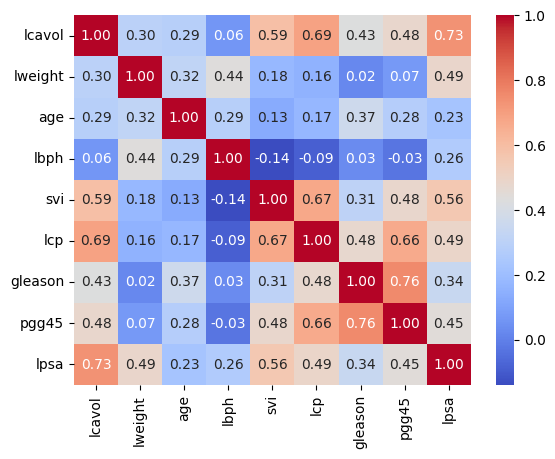

In [12]:
sns.heatmap(data_train.corr(), annot=True, fmt='.2f', cmap='coolwarm')

In [13]:
dict_means_stds = {}
for col in data_train.columns:
    if col != target:
        dict_means_stds[col] = {
            'mean': data_train[col].mean(),
            'std': data_train[col].std()
        }
        data_train[col] = (data_train[col] - data_train[col].mean()) / data_train[col].std()
dict_means_stds

{'lcavol': {'mean': np.float64(1.3134915526567164),
  'std': np.float64(1.2425903747500935)},
 'lweight': {'mean': np.float64(3.6261076865671638),
  'std': np.float64(0.47660076007331426)},
 'age': {'mean': np.float64(64.74626865671642),
  'std': np.float64(7.502208328586849)},
 'lbph': {'mean': np.float64(0.07143990820895524),
  'std': np.float64(1.4636548954318018)},
 'svi': {'mean': np.float64(0.22388059701492538),
  'std': np.float64(0.4199890158155315)},
 'lcp': {'mean': np.float64(-0.21420300955223878),
  'std': np.float64(1.4007352388888314)},
 'gleason': {'mean': np.float64(6.731343283582089),
  'std': np.float64(0.7088635709281826)},
 'pgg45': {'mean': np.float64(26.26865671641791),
  'std': np.float64(29.301764394880696)}}

In [14]:
X_train = data_train.drop(columns=[target]).values
# X = np.column_stack((np.ones(n), x, x))
X_train = np.column_stack((np.ones(X_train.shape[0]), X_train))
y_train = data_train[target].values

In [15]:
beta_ols = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
print(beta_ols.round(3))

U, D, Vh = np.linalg.svd(X_train, full_matrices=False)
print(U.shape, Vh.shape, D.shape)

beta_svd = Vh.T @ np.linalg.inv(np.diag(D)) @ U.T @ y_train
print(beta_svd.round(3))

[ 2.452  0.716  0.293 -0.143  0.212  0.31  -0.289 -0.021  0.277]
(67, 9) (9, 9) (9,)
[ 2.452  0.716  0.293 -0.143  0.212  0.31  -0.289 -0.021  0.277]


[ 1.015  6.784  1.639  1.329  0.735  0.615  0.427  0.289  0.182 -0.   ]


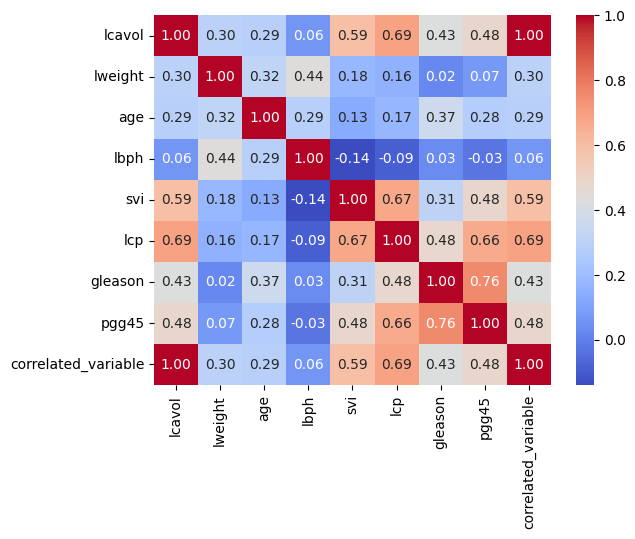

In [16]:
y_train = data_train[target]
x_train = data_train.drop(columns=[target])

x_train['correlated_variable'] = 2*x_train.lcavol# + 3*x_train.lweight


sns.heatmap(x_train.corr(), annot=True, fmt='.2f', cmap='coolwarm')
X_train = x_train.values
X_train = np.column_stack((np.ones(X_train.shape[0]), X_train))

print(np.linalg.eigvals(X_train.T@X_train / (X_train.shape[0]-1)).round(3))

In [17]:
beta_ols = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
print(beta_ols.round(3))


LinAlgError: Singular matrix

In [18]:
U, D, Vh = np.linalg.svd(X_train, full_matrices=False)
print(U.shape, Vh.shape, D.shape)

beta_svd = Vh.T @ np.linalg.inv(np.diag(D)) @ U.T @ y_train
print(beta_svd.round(3))

(67, 10) (10, 10) (10,)
[ 2.45200000e+00  4.38706706e+14  3.47000000e-01 -1.43000000e-01
  1.03000000e-01  2.98000000e-01 -2.41000000e-01 -1.30000000e-01
  2.84000000e-01 -2.19353353e+14]


In [21]:
idx_train = np.arange(x_train.shape[0])
# idx_train = np.random.choice(idx_train, size=int(X_train.shape[0]), replace=True)
X_train = x_train.iloc[idx_train].values
y_train = data_train.iloc[idx_train][target].values

X_train = np.column_stack((np.ones(X_train.shape[0]), X_train))

U, D, Vh = np.linalg.svd(X_train, full_matrices=False)
print(U.shape, Vh.shape, D.shape)

print(D.round(3))
D = D[:-1]
print(D.round(3))
U = U[:, :-1]
Vh = Vh[:-1, :]

print(U.shape, Vh.shape, D.shape)
beta_svd = Vh.T @ np.linalg.inv(np.diag(D)) @ U.T @ y_train
print(beta_svd.round(3))

# beta_ols = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
print(beta_ols.round(3))

(67, 10) (10, 10) (10,)
[21.16  10.4    9.366  8.185  6.966  6.369  5.311  4.364  3.466  0.   ]
[21.16  10.4    9.366  8.185  6.966  6.369  5.311  4.364  3.466]
(67, 9) (9, 10) (9,)
[ 2.452  0.143  0.293 -0.143  0.212  0.31  -0.289 -0.021  0.277  0.287]
[ 2.452  0.716  0.293 -0.143  0.212  0.31  -0.289 -0.021  0.277]


In [12]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=False)
reg.fit(X_train, y_train)
print(reg.coef_.round(3))

[ 2.452  0.143  0.293 -0.143  0.212  0.31  -0.289 -0.021  0.277  0.287]


[0.791 0.286 0.142]

[0.791 0.286 0.142]

[ 2.452  0.716  0.293 -0.143  0.212  0.31  -0.289 -0.021  0.277]


In [66]:
([ 0.716,  0.293, -0.143,  0.212,  0.31 , -0.289, -0.021,  0.277])
[ 0.143  0.293 -0.143  0.212  0.31  -0.289 -0.021  0.277  0.287]



[0.716, 0.293, -0.143, 0.212, 0.31, -0.289, -0.021, 0.277]